In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
combined_mouse.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = combined_mouse[combined_mouse.duplicated(['Mouse ID','Timepoint'])]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Display data from duplicate mouse id
duplicate_mouse = combined_mouse.loc[combined_mouse['Mouse ID'] == 'g989', :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Drop duplicate mouse ID and display the count of data
clean_mouse_df = combined_mouse.drop_duplicates(['Mouse ID', 'Timepoint'])
clean_mouse_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

regimen_group = clean_mouse_df.groupby('Drug Regimen')
tumor_vol = regimen_group['Tumor Volume (mm3)']
# Calculate mean for regimen group by Tumor Volume
mean_tumor_vol = tumor_vol.mean()

# Calculate median for regimen group by Tumor Volume
median_tumor_vol = tumor_vol.median()

# Calculate variance for regimen group by Tumor Volume
var_tumor_vol = tumor_vol.var()

# Calculate standard deviation for regimen group by Tumor Volume
sd_tumor_vol = tumor_vol.std()

# Calculate the SEM for regimen by Tumor Volume
sem_tumor_vol = tumor_vol.sem()

# Create dataframe for summary stats for regimen by Tumor Volume
sum_stats_regimen = pd.DataFrame({
    'Mean':mean_tumor_vol,
    'Median':median_tumor_vol,
    'Variance':var_tumor_vol,
    'Standard Deviation':sd_tumor_vol,
    'SEM':sem_tumor_vol,
})
sum_stats_regimen

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
tumor_vol.agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


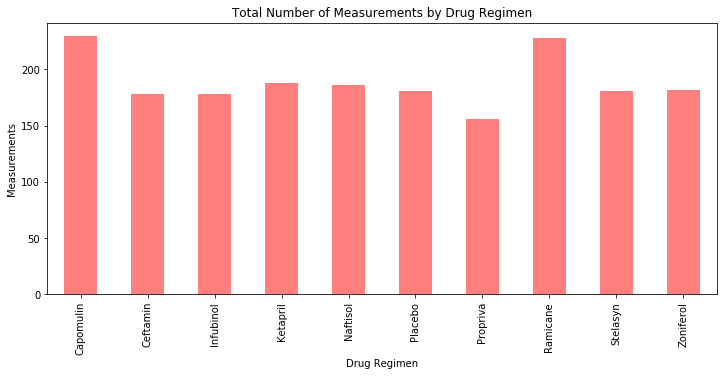

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_measure = regimen_group['Mouse ID'].count()
num_measure.plot(kind='bar', color='r', alpha=0.5, align="center", figsize=(12,5))
plt.title('Total Number of Measurements by Drug Regimen')
plt.ylabel('Measurements')
plt.show()

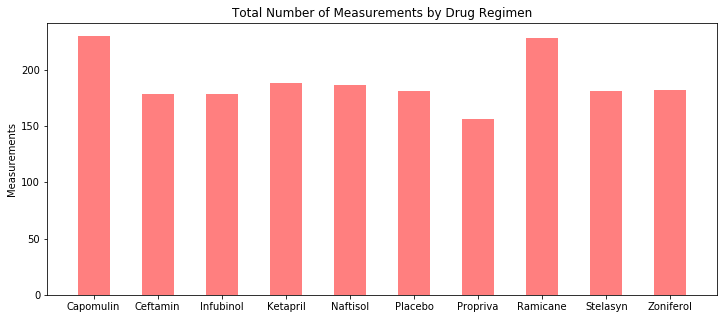

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

regimen = clean_mouse_df['Drug Regimen'].unique()
regimen.sort()

plt.figure(figsize=(12,5))
plt.bar(regimen, num_measure, color='r', alpha=0.5, width = .5, align="center")

plt.title('Total Number of Measurements by Drug Regimen')
plt.ylabel('Measurements')

plt.show()

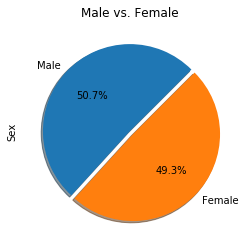

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_dist = clean_mouse_df['Sex'].value_counts()
explode = (0,0.05)
gender_dist.plot(kind='pie', explode=explode, autopct='%1.1f%%', shadow=True, startangle=45, subplots=True)
plt.title('Male vs. Female')
plt.show()

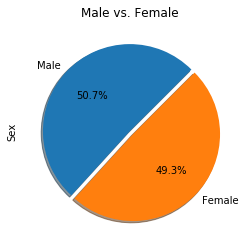

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ('Male', 'Female')
plt.pie(gender_dist, explode=explode, labels=genders, autopct='%1.1f%%', shadow=True, startangle=45)
plt.ylabel('Sex')
plt.title('Male vs. Female')
plt.show()

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean_mouse_df.groupby('Mouse ID')

last_timepoint = mouse_group['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_tp_merge = pd.merge(clean_mouse_df, last_timepoint, on='Mouse ID')

last_tp_clean = last_tp_merge.drop_duplicates(['Mouse ID', 'Timepoint_y'], keep='last')
last_tp_clean = last_tp_clean.drop(columns='Timepoint_y')


In [13]:
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_list = []


for drug in drug_regimen:
    
    drug_df = last_tp_clean.loc[last_tp_clean['Drug Regimen'] == drug]
    
    tumor_value = drug_df['Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_value)
    
    quartiles = tumor_value.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    outlier_count = (tumor_value.loc[(drug_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (drug_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f"{drug} has {outlier_count} outliers.")
    
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Capomulin has 0 outliers.
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Ramicane has 0 outliers.
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Infubinol has 1 outliers.
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Ceftamin has 0 outliers.


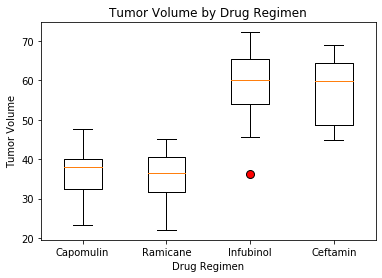

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none')

plt.boxplot(tumor_vol_list, labels=drug_regimen, flierprops=flierprops)
plt.title("Tumor Volume by Drug Regimen")
plt.ylabel("Tumor Volume")
plt.xlabel("Drug Regimen")

plt.show()

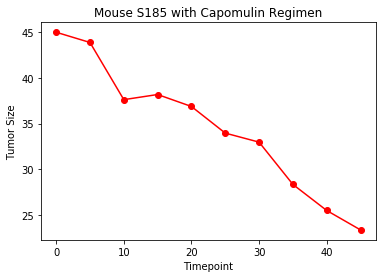

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

s185_tumor = clean_mouse_df['Tumor Volume (mm3)'].loc[clean_mouse_df['Mouse ID'] == 's185']

s185_timepoint = clean_mouse_df['Timepoint'].loc[clean_mouse_df['Mouse ID'] == 's185']

plt.plot(s185_timepoint,s185_tumor, marker='o', color='red')
plt.title('Mouse S185 with Capomulin Regimen')
plt.ylabel('Tumor Size')
plt.xlabel('Timepoint')

plt.show()

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

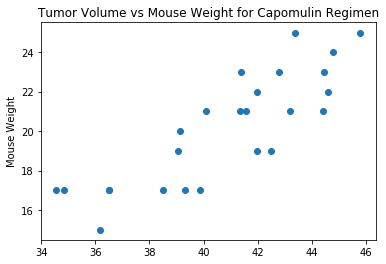

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_id = ['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157']
avg_tumor_list = []
mouse_weight_list = []

for mouse in mouse_id:
    
    mouse_df = clean_mouse_df.loc[clean_mouse_df['Mouse ID'] == mouse]
    
    avg_tumor_vol = mouse_df['Tumor Volume (mm3)'].mean()
    avg_tumor_list.append(avg_tumor_vol)
    
    weight_df = last_tp_clean.loc[last_tp_clean['Mouse ID'] == mouse]
    mouse_weight =  weight_df['Weight (g)'].values[0]
    mouse_weight_list.append(mouse_weight)


Capomulin_df = pd.DataFrame({'Mouse ID':mouse_id,
                            'Avg Tumor Vol':avg_tumor_list,
                            'Weight (g)':mouse_weight_list})

plt.scatter(avg_tumor_list, mouse_weight_list)
plt.title('Tumor Volume vs Mouse Weight for Capomulin Regimen')
plt.ylabel('Mouse Weight')
plt.xlabel()

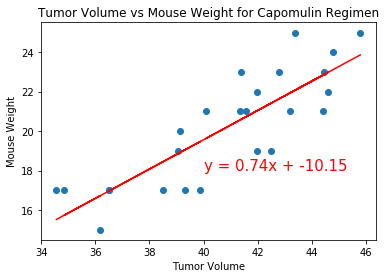

The correlation coefficient between tumor volume and mouse weight is 0.84


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_list, mouse_weight_list)
regress_values = np.array(avg_tumor_list) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_tumor_list, mouse_weight_list)
plt.plot(avg_tumor_list,regress_values,"r-")
plt.annotate(line_eq,(40,18),fontsize=15,color="red")
plt.title('Tumor Volume vs Mouse Weight for Capomulin Regimen')
plt.ylabel('Mouse Weight')
plt.xlabel('Tumor Volume')

plt.show()
print(f"The correlation coefficient between tumor volume and mouse weight is {round(st.pearsonr(avg_tumor_list, mouse_weight_list)[0],2)}")